In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading in our data
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Check the info; missing values and the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# 1. The data has no missing values
# 2. All the columns have their content in numerical values ideal for modelling

In [5]:
#Check for duplicates
data.duplicated().sum()

1

In [6]:
#Checking the duplicated row
duplic = data.duplicated()
duplicated_rows = data[duplic]
print(duplicated_rows)


     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


In [7]:
#Dropping the duplicate data
new_data = data.drop_duplicates()
new_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
new_data.duplicated().sum()

0

In [10]:
new_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


InterQuantile Range
75%- 25% values in a dataset

Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4.Find lower bound q1*1.5
5.Find upper bound q3*1.5
Anything that lies outside of lower and upper bound is an outlier

In [11]:
# Step 1: Calculate IQR for each column
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1

# Step 2: Determine lower and upper bounds
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Step 3: Identify outliers in the dataset
outliers = ((new_data < lower_bound) | (new_data > upper_bound)).any(axis=1)

# Display rows containing outliers
print("Rows with Outliers:")
print(new_data[outliers])


Rows with Outliers:
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
8     52    1   2     172   199    1        1       162     0      0.5    2   
14    58    0   3     150   283    1        0       162     0      1.0    2   
23    61    1   2     150   243    1        1       137     1      1.0    1   
26    59    1   2     150   212    1        1       157     0      1.6    2   
28    65    0   2     140   417    1        0       157     0      0.8    2   
29    53    1   2     130   197    1        0       152     0      1.2    0   
36    54    0   2     135   304    1        1       170     0      0.0    2   
60    71    0   2     110   265    1        0       130     0      0.0    2   
64    58    1   2     140   211    1        0       165     0      0.0    2   
76    51    1   2     125   245    1        0       166     0      2.4    1   
78    52    1   1     128   205 

In [12]:
new_data[outliers].value_counts().sum()

46

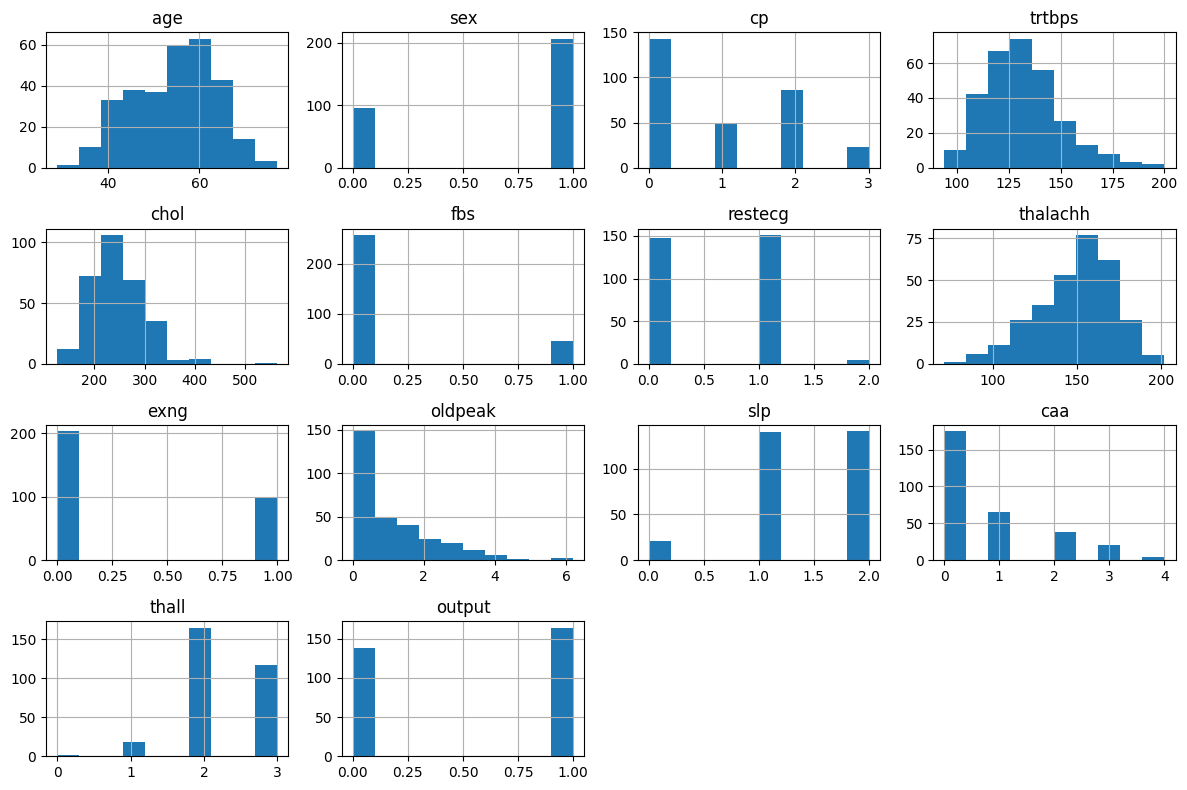

In [13]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns in new_data
new_data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


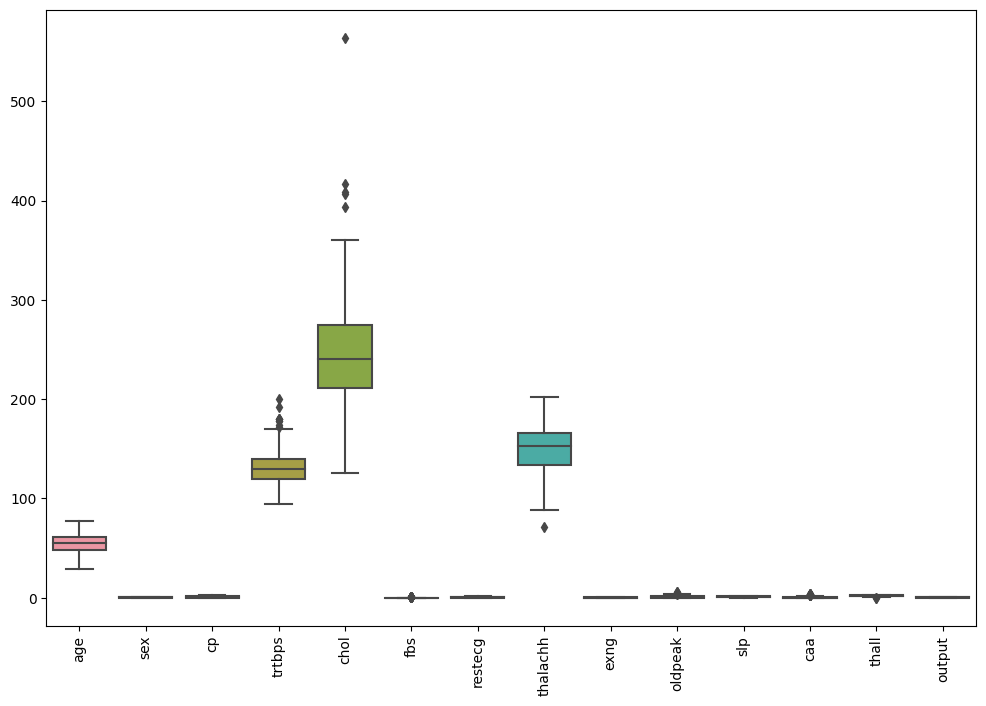

In [14]:
import seaborn as sns

# Create box plots for numerical columns in new_data
plt.figure(figsize=(12, 8))
sns.boxplot(data=new_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
plt.show()


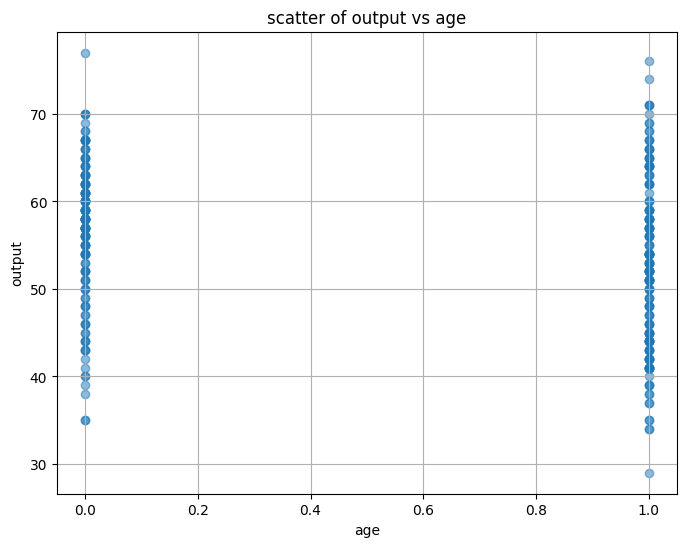

In [15]:
def scatter_plot(dataset, column1, column2):
  plt.figure(figsize = (8,6))
  plt.scatter(data[column1], data[column2], alpha=0.5)
  plt.title(f'scatter of {column1} vs {column2}')
  plt.xlabel(column2)
  plt.ylabel(column1)
  plt.grid(True)
  plt.show()

plot_this = scatter_plot(new_data, 'output', 'age')
plot_this

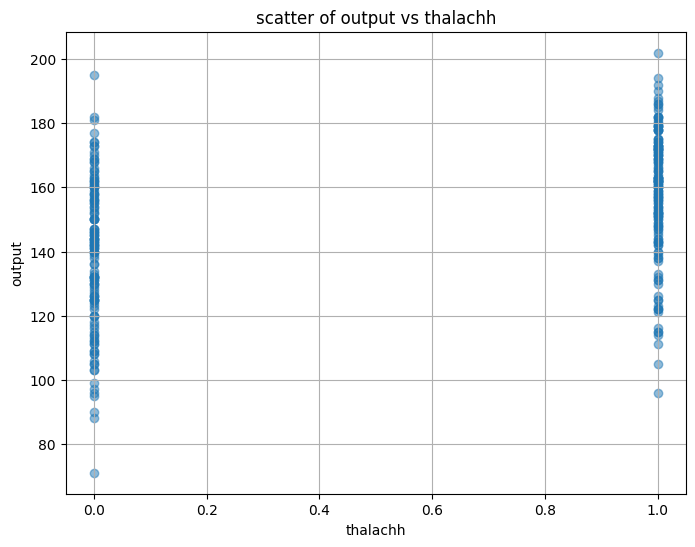

In [16]:
plot_this = scatter_plot(new_data, 'output', 'thalachh')
plot_this


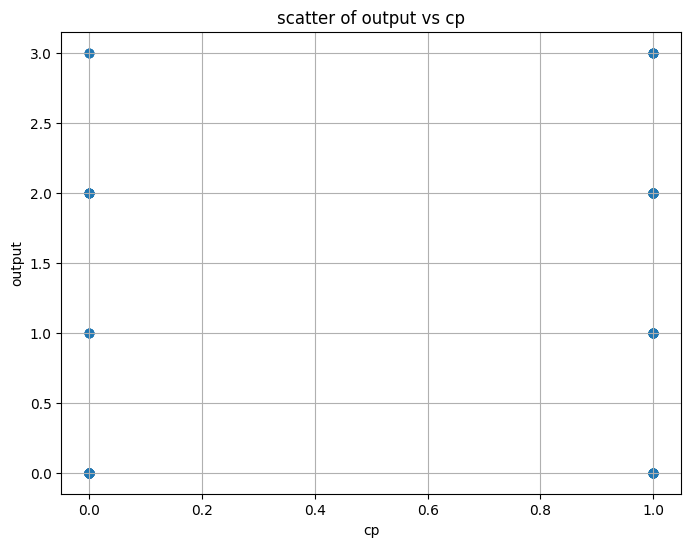

In [17]:
plot_this = scatter_plot(new_data, 'output', 'cp')
plot_this

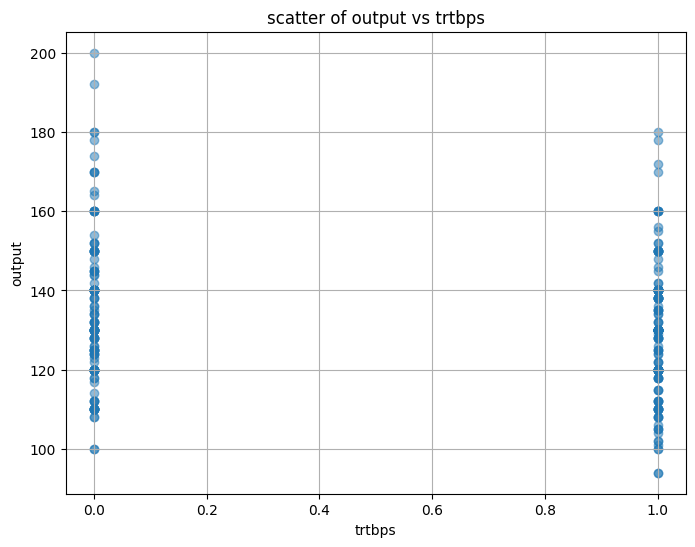

In [18]:
plot_this = scatter_plot(new_data, 'output', 'trtbps')
plot_this

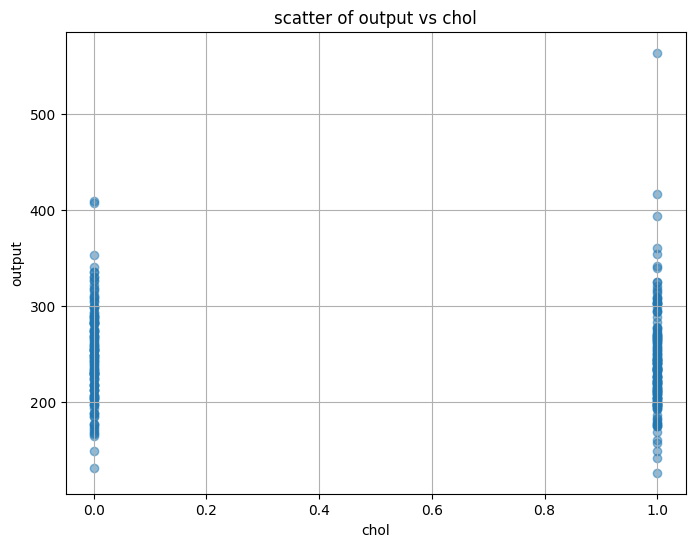

In [19]:
plot_this = scatter_plot(new_data, 'output', 'chol')
plot_this

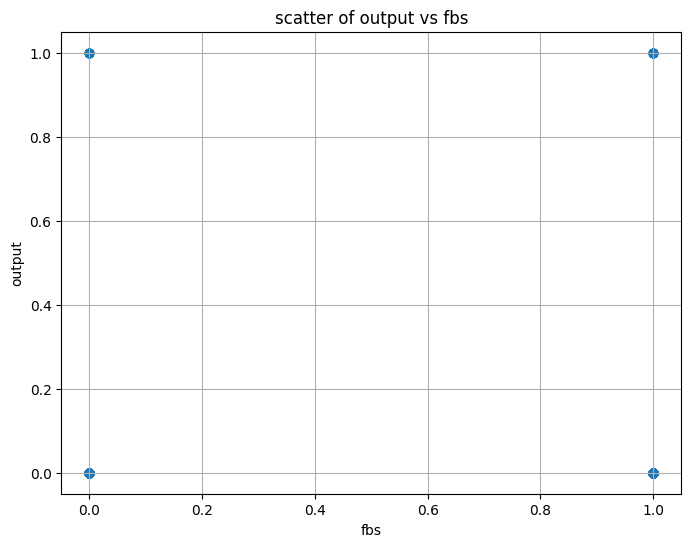

In [20]:
plot_this = scatter_plot(new_data, 'output', 'fbs')
plot_this

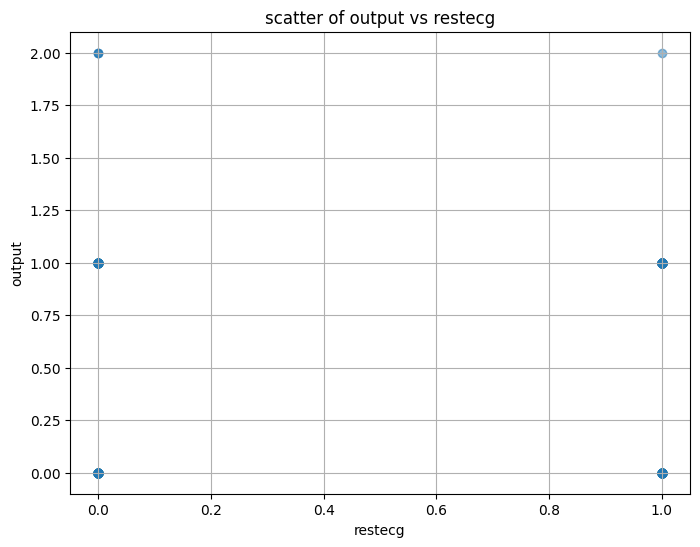

In [21]:
plot_this = scatter_plot(new_data, 'output', 'restecg')
plot_this

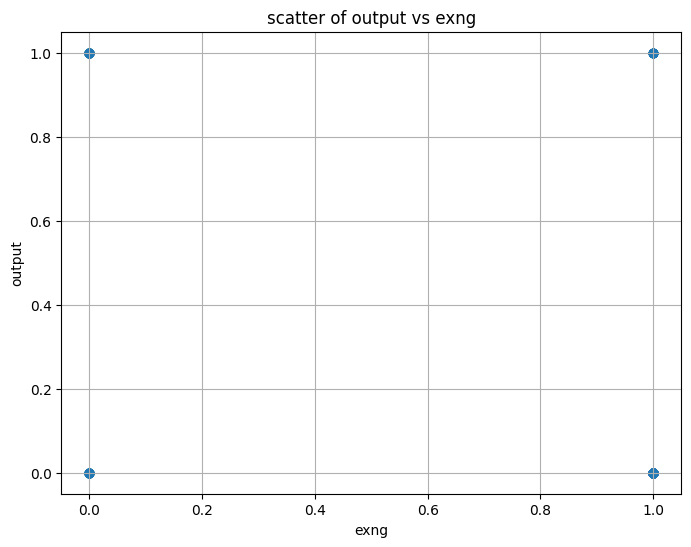

In [22]:
plot_this = scatter_plot(new_data, 'output', 'exng')
plot_this

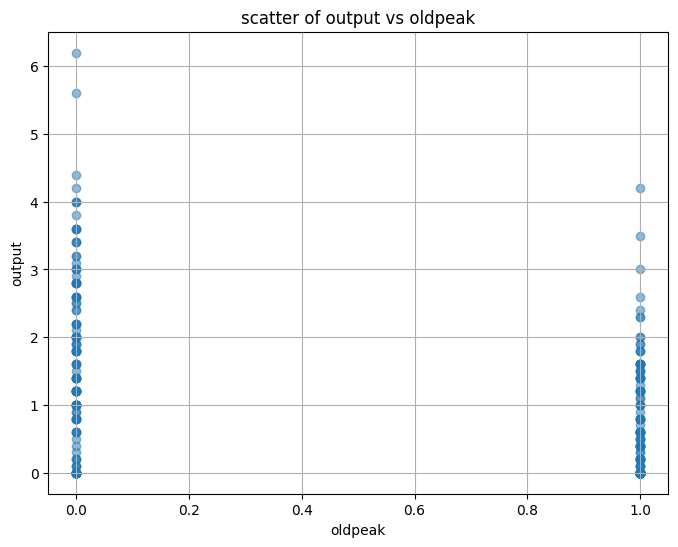

In [23]:
plot_this = scatter_plot(new_data, 'output', 'oldpeak')
plot_this

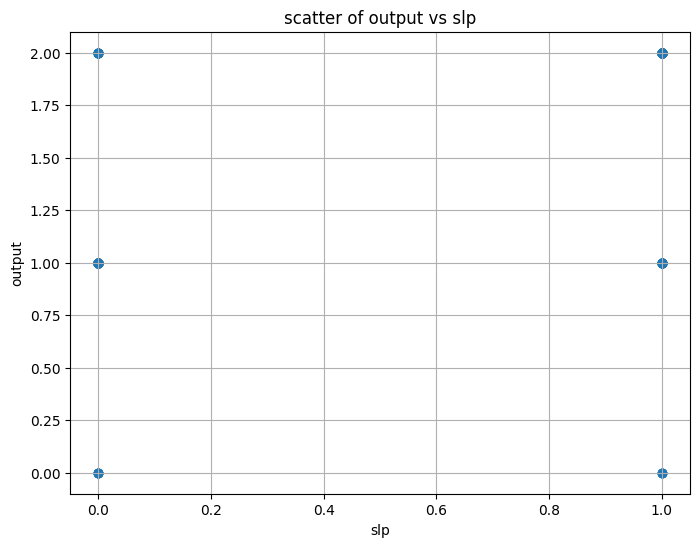

In [24]:
plot_this = scatter_plot(new_data, 'output', 'slp')
plot_this

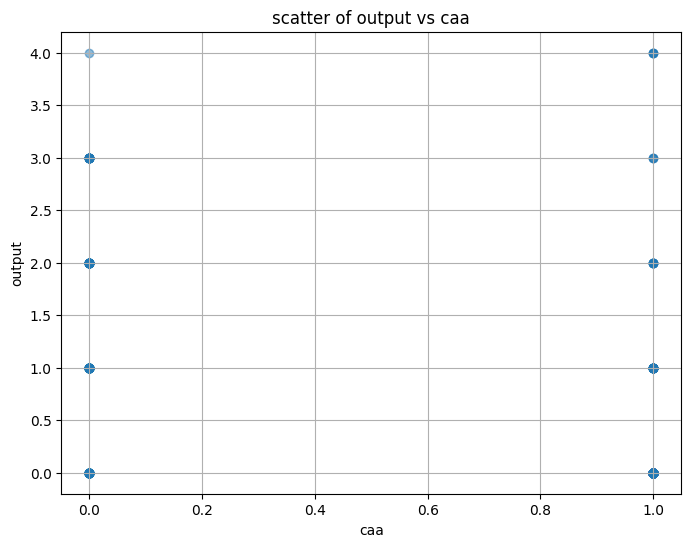

In [25]:
plot_this = scatter_plot(new_data, 'output', 'caa')
plot_this

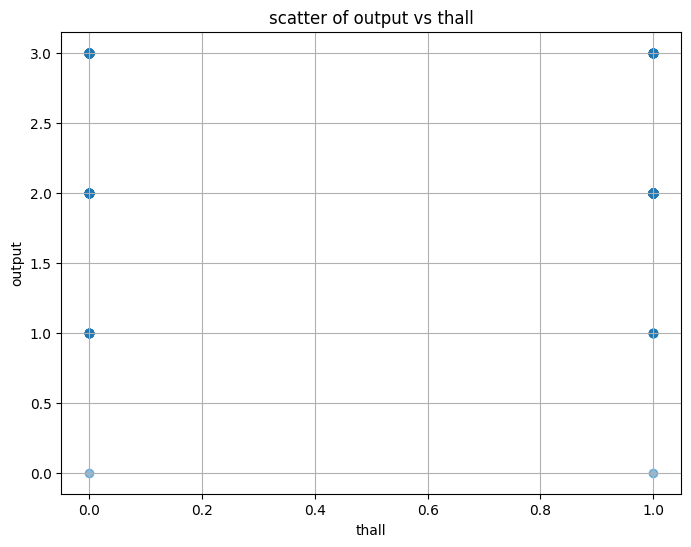

In [26]:
plot_this = scatter_plot(new_data, 'output', 'thall')
plot_this

In [30]:
#Scaling the data to handle outliers
from sklearn.preprocessing import StandardScaler

In [31]:
#scale numerical features
features = new_data.drop(columns=['output']).columns
target = 'Label'

# define standard scaler
scaler = StandardScaler()

# transform data
new_data[features] = scaler.fit_transform(new_data[features])

<ipython-input-31-cc34226f810a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[features] = scaler.fit_transform(new_data[features])


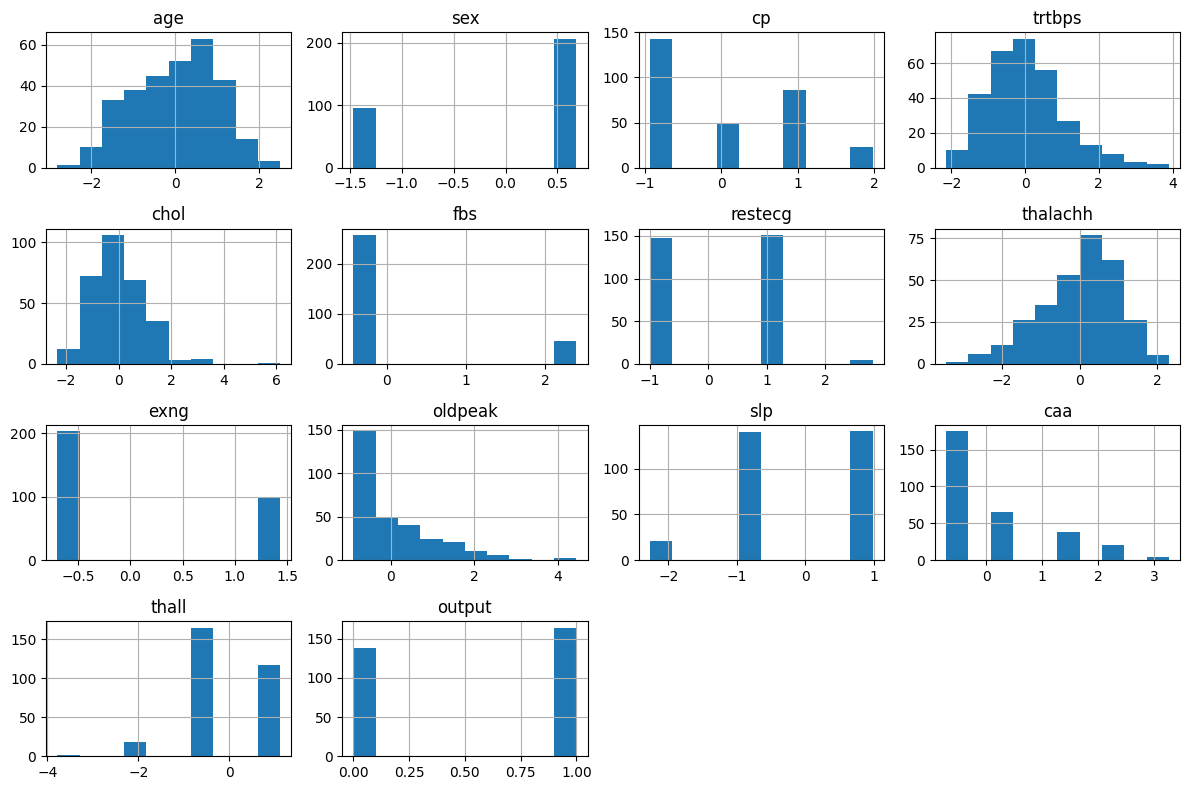

In [32]:
# Plot histograms for numerical columns in new_data
new_data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [33]:
#Checking the class distribution for any imbalance
new_data['output'].value_counts()

1    164
0    138
Name: output, dtype: int64

In [28]:
#The data is fairly distributed